In [ ]:
!pip install statannotations

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
from scipy.stats import linregress

In [ ]:
#Path
file_path = "/content/drive/MyDrive/Colab Notebooks/NBG/NBG_WdDensity_merged.xlsx"

#Load
df = pd.read_excel(file_path)

In [ ]:
#check
print(df.shape)   # shows rows and columns
df.head()         # shows first 5 rows

(38870, 44)


,Tree_id,Longitude,Latitude,Species,Family,Genus,Tree_name,Tree_status,Tree_decay,Tree_ht_tot,...,ca_Adjusted,Radius_m,Volume_m3,Basal_Area_m2,Density_tpm3,AGB_kg,AGB_ton,Carbon_content,BGB_ton,Total_biomass
0,1,90.348489,23.816458,Abroma augustum,Malvaceae,Abroma,হলুদ কম্বল,Live Tree,NaN,2.9,...,1.154535,0.0125,0.000475,0.000491,0.57,0.657398,0.000657,0.000378,0.000099,0.000756
1,2,90.348294,23.818528,Acacia aulacocarpa,Fabaceae,Acacia,আকাশমনি,Live Tree,NaN,17.9,...,18.752559,0.1175,0.258796,0.043374,0.57,308.217965,0.308218,0.177225,0.046233,0.354451
2,3,90.351626,23.818417,Acacia aulacocarpa,Fabaceae,Acacia,আকাশমনি,Live Tree,NaN,19.2,...,24.630086,0.1595,0.511507,0.079923,0.57,599.308360,0.599308,0.344602,0.089896,0.689205
3,4,90.351610,23.820828,Acacia aulacocarpa,Fabaceae,Acacia,আকাশমনি,Live Tree,NaN,21.5,...,11.341149,0.1340,0.404275,0.056410,0.57,476.351984,0.476352,0.273902,0.071453,0.547805
4,5,90.351374,23.820597,Acacia aulacocarpa,Fabaceae,Acacia,আকাশমনি,Live Tree,NaN,25.2,...,25.580654,0.2110,1.174882,0.139867,0.57,1349.353548,1.349354,0.775878,0.202403,1.551757


In [ ]:
# Columns to drop
cols_to_drop = [
    "tree_dbh2",
    "tree_hight_total",
    "tree_hight_live_top",
    "tree_hight_base",
    "tree_Width_NS3",
    "tree_Width_EW4",
    "crown_missing5",
    "CA",
    "Tree_status",
     "Tree_decay"
]

# Drop the columns
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])


In [ ]:
#check
print(df.shape)   # shows rows and columns
df.head()         # shows first 5 rows

(38870, 34)


,Tree_id,Longitude,Latitude,Species,Family,Genus,Tree_name,Tree_ht_tot,Tree_ht_live_top,Tree_ht_base,...,ca_Adjusted,Radius_m,Volume_m3,Basal_Area_m2,Density_tpm3,AGB_kg,AGB_ton,Carbon_content,BGB_ton,Total_biomass
0,1,90.348489,23.816458,Abroma augustum,Malvaceae,Abroma,হলুদ কম্বল,2.9,2.9,1.90,...,1.154535,0.0125,0.000475,0.000491,0.57,0.657398,0.000657,0.000378,0.000099,0.000756
1,2,90.348294,23.818528,Acacia aulacocarpa,Fabaceae,Acacia,আকাশমনি,17.9,17.9,11.12,...,18.752559,0.1175,0.258796,0.043374,0.57,308.217965,0.308218,0.177225,0.046233,0.354451
2,3,90.351626,23.818417,Acacia aulacocarpa,Fabaceae,Acacia,আকাশমনি,19.2,19.2,15.10,...,24.630086,0.1595,0.511507,0.079923,0.57,599.308360,0.599308,0.344602,0.089896,0.689205
3,4,90.351610,23.820828,Acacia aulacocarpa,Fabaceae,Acacia,আকাশমনি,21.5,21.5,18.10,...,11.341149,0.1340,0.404275,0.056410,0.57,476.351984,0.476352,0.273902,0.071453,0.547805
4,5,90.351374,23.820597,Acacia aulacocarpa,Fabaceae,Acacia,আকাশমনি,25.2,25.2,18.10,...,25.580654,0.2110,1.174882,0.139867,0.57,1349.353548,1.349354,0.775878,0.202403,1.551757


In [ ]:
print(df.dtypes)

Tree_id                  int64
Longitude              float64
Latitude               float64
Species                 object
Family                  object
Genus                   object
Tree_name               object
Tree_ht_tot            float64
Tree_ht_live_top       float64
Tree_ht_base           float64
Tree_dbh               float64
Tree_width_NS          float64
Tree_width_EW          float64
Crown_missing            int64
Light_exposer            int64
Crown_dieback            int64
Street_tree              int64
Tree_climber             int64
Tree_buttress            int64
tree_inun                int64
Spp_origin              object
Conservation_status     object
Avg_Diameter           float64
Radius                 float64
ca_Adjusted            float64
Radius_m               float64
Volume_m3              float64
Basal_Area_m2          float64
Density_tpm3           float64
AGB_kg                 float64
AGB_ton                float64
Carbon_content         float64
BGB_ton 

In [ ]:
# Columns to recode
cat_cols = ["Street_tree", "Tree_climber", "Tree_buttress", "tree_inun"]
df[cat_cols] = df[cat_cols].replace({1: 1, 2: 0})

In [ ]:
# Columns to one hot encode
encode_cols = ["Spp_origin", "Conservation_status"]

# Keep only those that actually exist in your DataFrame
encode_cols = [c for c in encode_cols if c in df.columns]

# One-hot encode
df = pd.get_dummies(df, columns=encode_cols, drop_first=False)
print(df.dtypes)

Tree_id                            int64
Longitude                        float64
Latitude                         float64
Species                           object
Family                            object
Genus                             object
Tree_name                         object
Tree_ht_tot                      float64
Tree_ht_live_top                 float64
Tree_ht_base                     float64
Tree_dbh                         float64
Tree_width_NS                    float64
Tree_width_EW                    float64
Crown_missing                      int64
Light_exposer                      int64
Crown_dieback                      int64
Street_tree                        int64
Tree_climber                       int64
Tree_buttress                      int64
tree_inun                          int64
Avg_Diameter                     float64
Radius                           float64
ca_Adjusted                      float64
Radius_m                         float64
Volume_m3       

/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

False vs. True: t-test independent samples, P_val:7.167e-142 t=2.546e+01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:2.077e-127 t=-2.410e+01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:3.573e-01 t=9.204e-01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:1.356e-30 t=-1.151e+01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

False vs. True: t-test independent samples, P_val:3.377e-167 t=2.770e+01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:6.827e-118 t=-2.316e+01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:1.802e-15 t=7.958e+00


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:8.404e-02 t=-1.728e+00


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

False vs. True: t-test independent samples, P_val:4.591e-125 t=2.387e+01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:7.038e-47 t=-1.440e+01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:1.987e-24 t=1.021e+01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:2.131e-03 t=-3.072e+00


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

False vs. True: t-test independent samples, P_val:6.339e-07 t=4.981e+00


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:3.630e-01 t=-9.097e-01


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:3.161e-11 t=6.641e+00


/tmp/ipython-input-2301240855.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0 vs. 1: t-test independent samples, P_val:5.558e-04 t=-3.453e+00


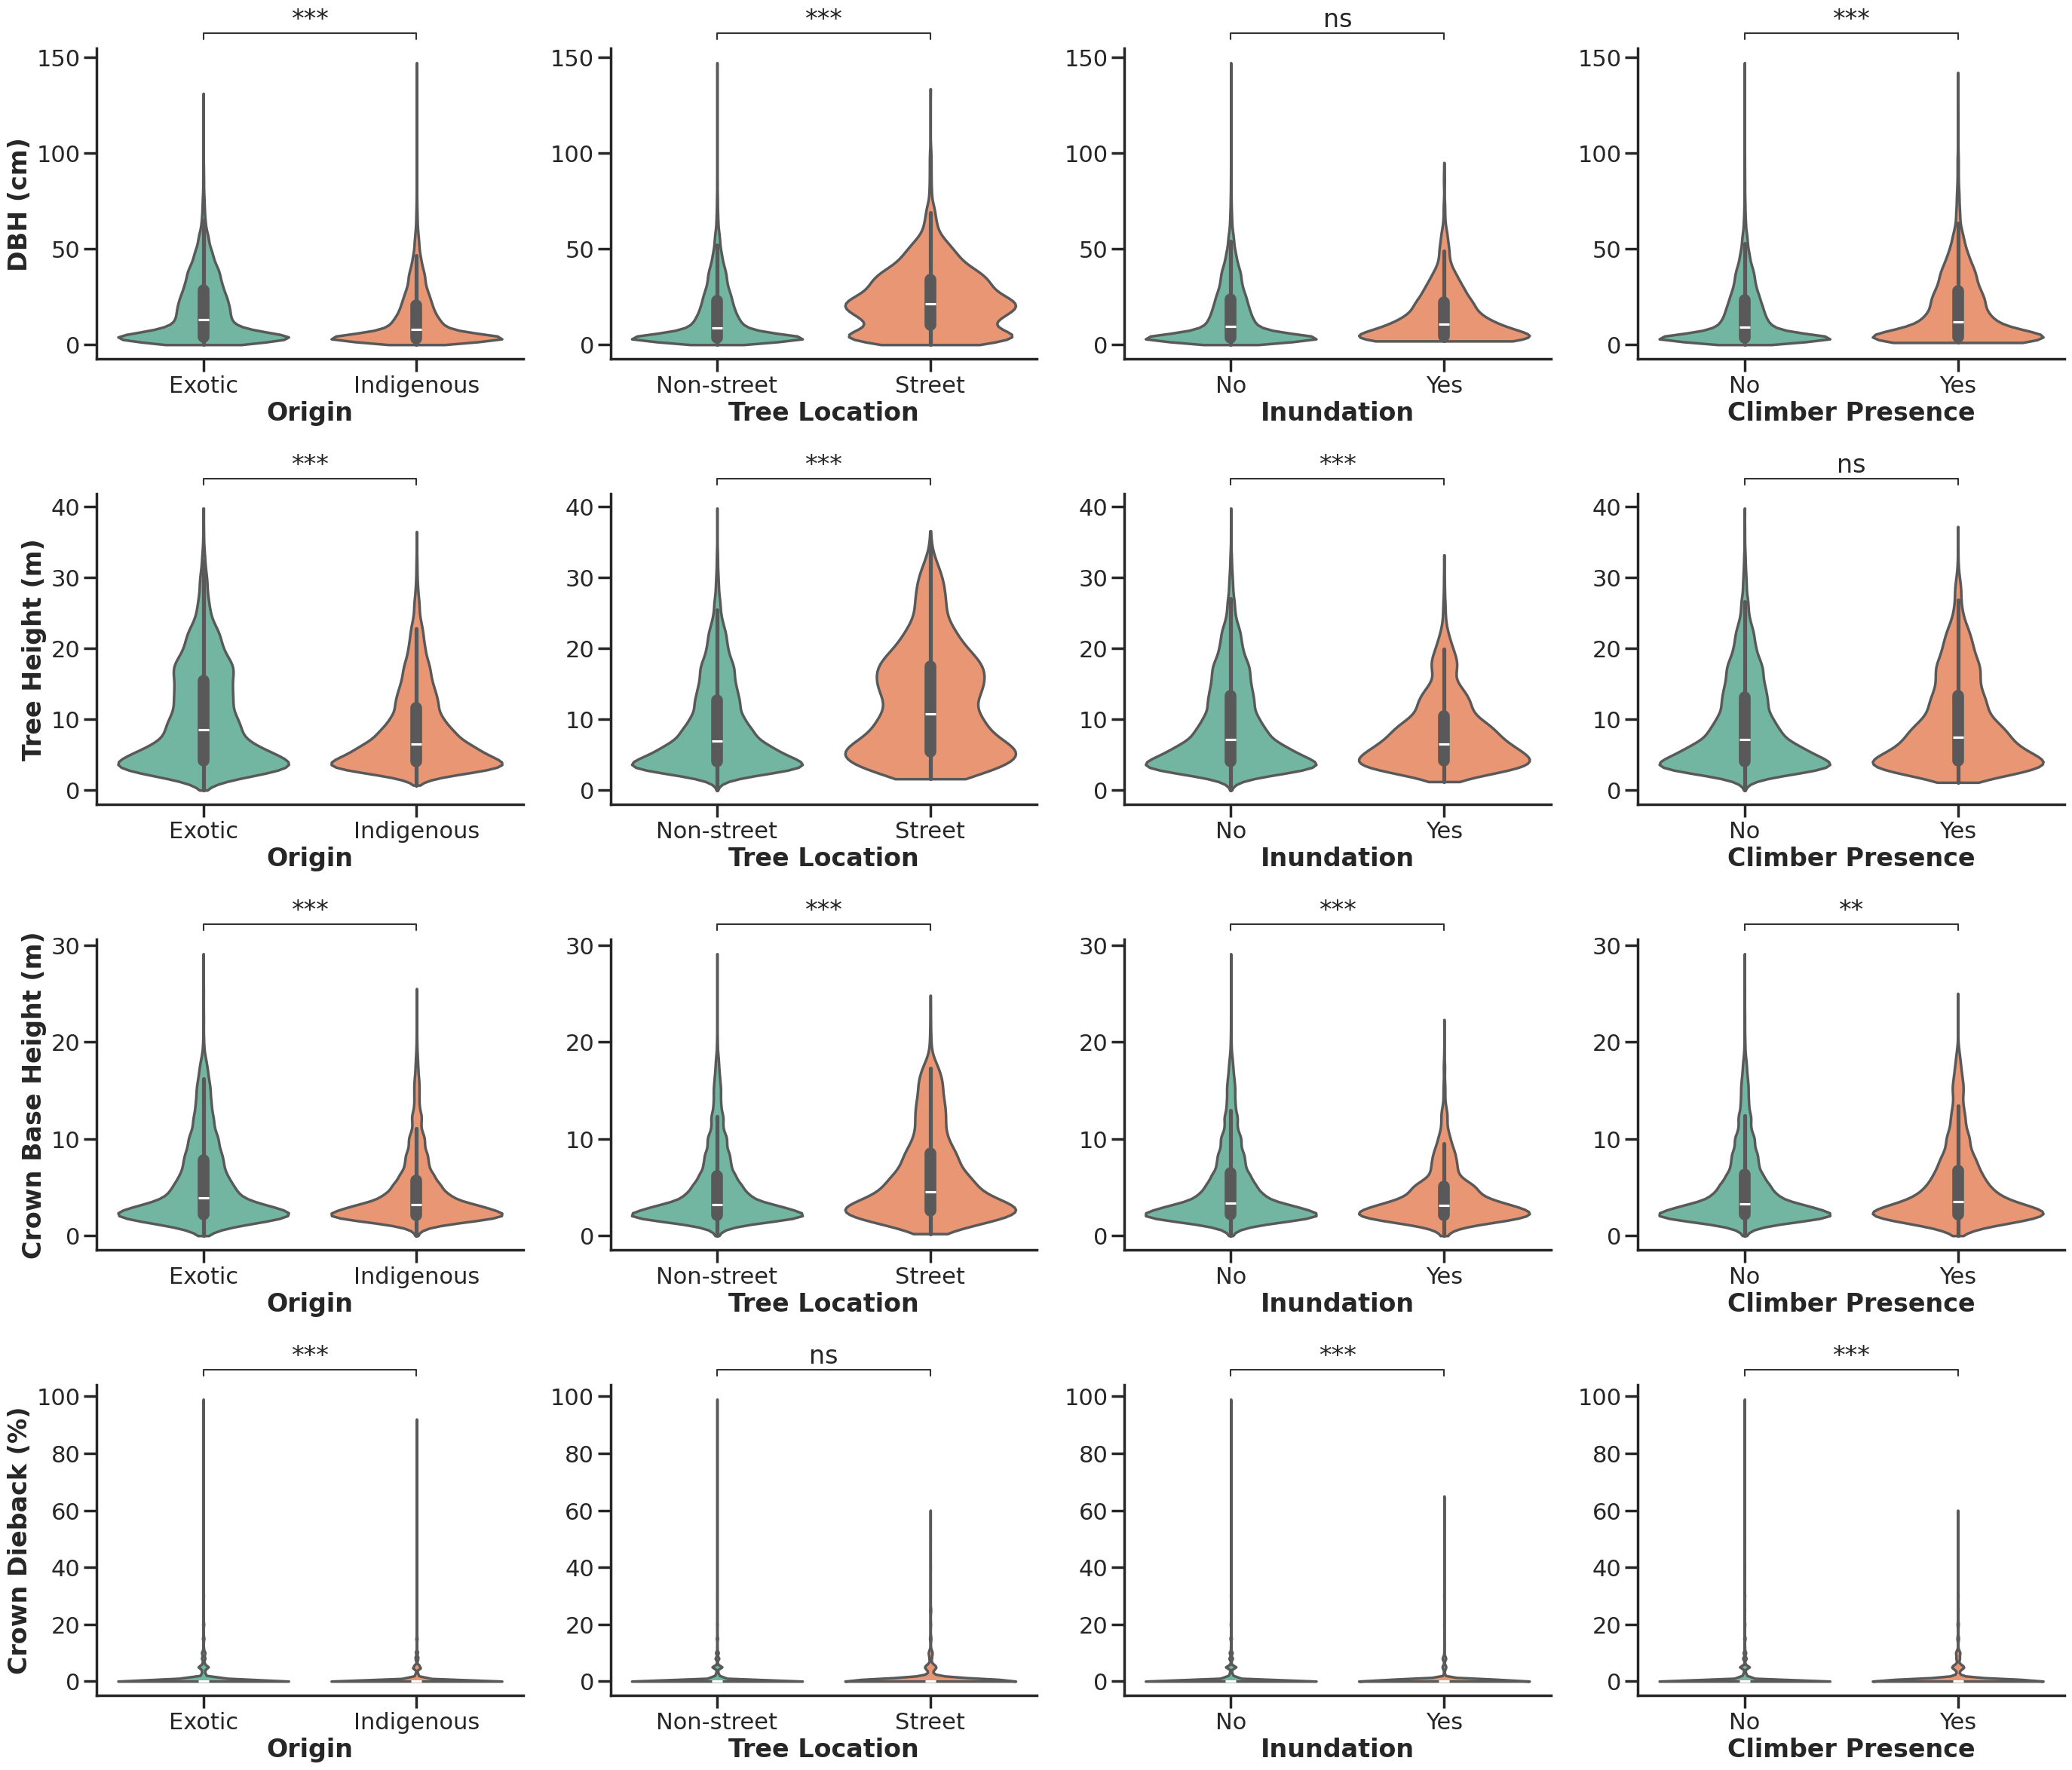

In [ ]:
# Set style and context
sns.set(style="ticks", context="poster")
plt.rcParams.update({
    "axes.labelsize": 24,
    "xtick.labelsize": 22,
    "ytick.labelsize": 22
})

fig, axes = plt.subplots(4, 4, figsize=(28, 24))

# Variables (rows)
y_vars = [
    ("Tree_dbh", "DBH (cm)"),
    ("Tree_ht_tot", "Tree Height (m)"),
    ("Tree_ht_base", "Crown Base Height (m)"),
    ("Crown_dieback", "Crown Dieback (%)")
]

# Grouping factors (columns)
x_vars = [
    ("Spp_origin_Indigenous", ["Exotic", "Indigenous"], "Origin"),
    ("Street_tree", ["Non-street", "Street"], "Tree Location"),
    ("tree_inun", ["No", "Yes"], "Inundation"),
    ("Tree_climber", ["No", "Yes"], "Climber Presence")
]

# Loop through subplots
for i, (yvar, ylabel) in enumerate(y_vars):
    if yvar not in df.columns:
        for j in range(4):
            axes[i, j].axis("off")
        continue

    for j, (xvar, labels, xlabel) in enumerate(x_vars):
        if xvar not in df.columns:
            axes[i, j].axis("off")
            continue

        ax = axes[i, j]
        sns.violinplot(
            data=df, x=xvar, y=yvar,
            ax=ax, palette="Set2",
            inner="box", cut=0
        )

        # Axis labels
        ax.set_xlabel(xlabel, fontsize=24, fontweight="bold")
        ax.set_xticks([0, 1])
        ax.set_xticklabels(labels, fontsize=22, rotation=0)

        if j == 0:
            ax.set_ylabel(ylabel, fontsize=24, fontweight="bold")
        else:
            ax.set_ylabel("")

        sns.despine(ax=ax)

        # --- Add statistical test ---
        pairs = [(0, 1)]   # since your df uses 0/1 coding
        annotator = Annotator(ax, pairs, data=df, x=xvar, y=yvar)
        annotator.configure(
            test='t-test_ind',
            text_format='star',
            loc='outside',
            pvalue_thresholds=[(1e-3, "***"), (1e-2, "**"), (0.05, "*"), (1, "ns")]
            )
        annotator.apply_and_annotate()

plt.tight_layout()
plt.show()


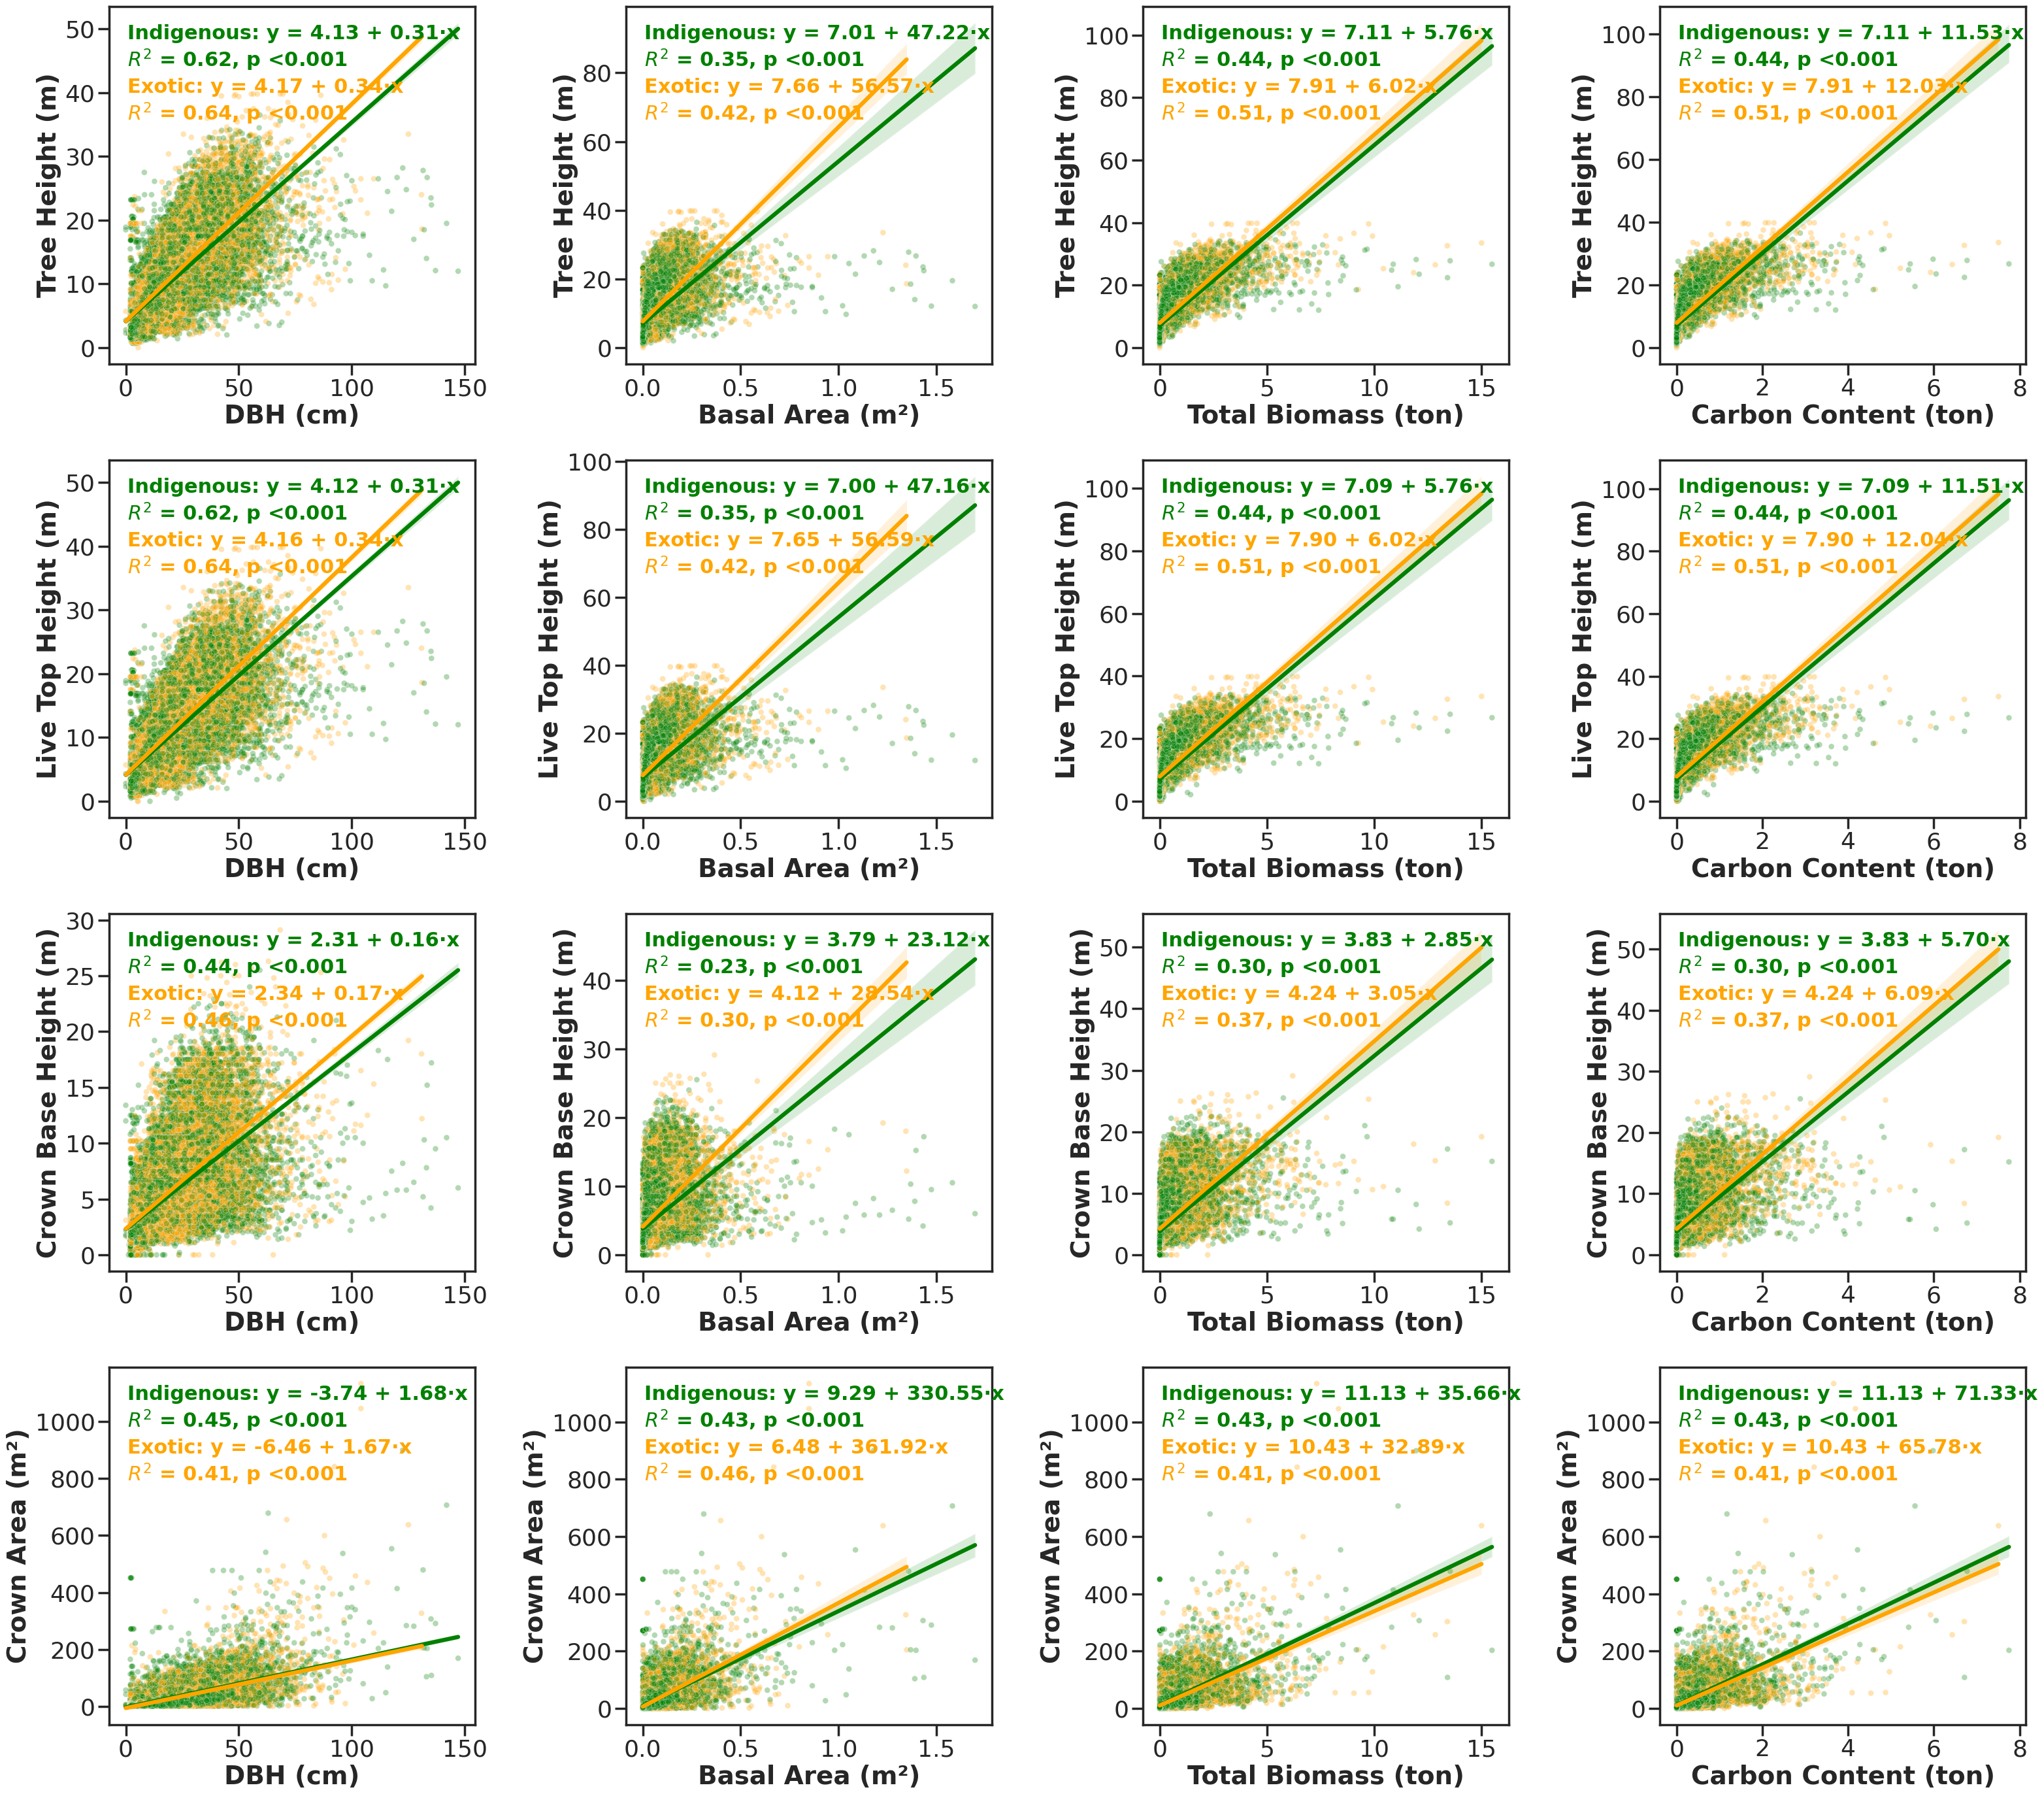

In [ ]:
# Seaborn style without grid
sns.set(style="ticks", context="poster")
plt.rcParams.update({
    "axes.labelsize": 30,
    "xtick.labelsize": 26,
    "ytick.labelsize": 26,
    "legend.fontsize": 24
})

# Create 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(32, 28))

# Define Y-axis (rows)
y_vars = [
    ("Tree_ht_tot", "Tree Height (m)"),
    ("Tree_ht_live_top", "Live Top Height (m)"),
    ("Tree_ht_base", "Crown Base Height (m)"),
    ("ca_Adjusted", "Crown Area (m²)")
]

# Define X-axis (columns)
x_vars = [
    ("Tree_dbh", "DBH (cm)"),
    ("Basal_Area_m2", "Basal Area (m²)"),
    ("Total_biomass", "Total Biomass (ton)"),
    ("Carbon_content", "Carbon Content (ton)")
]

# Colors for origin
palette = {1: "green", 0: "orange"}

def format_p(p):
    """Return compact p-value string."""
    if p < 0.001:
        return "<0.001"
    elif p < 0.01:
        return "<0.01"
    elif p < 0.05:
        return "<0.05"
    else:
        return "ns"

# Loop through rows and columns
for i, (yvar, ylabel) in enumerate(y_vars):
    if yvar not in df.columns:
        for j in range(4):
            axes[i, j].axis("off")
        continue

    for j, (xvar, xlabel) in enumerate(x_vars):
        if xvar not in df.columns:
            axes[i, j].axis("off")
            continue

        ax = axes[i, j]

        # Scatter points colored by origin
        sns.scatterplot(
            data=df, x=xvar, y=yvar,
            hue="Spp_origin_Indigenous",
            palette=palette,
            alpha=0.3, s=40, ax=ax, legend=False
        )

        # Fit regression for Indigenous (1) and Exotic (0)
        for origin, color, label, y_offset in [
            (1, "green", "Indigenous", 0.95),
            (0, "orange", "Exotic", 0.80)
        ]:
            subset = df[df["Spp_origin_Indigenous"] == origin]
            X = subset[[xvar]].dropna()
            y = subset[yvar].loc[X.index].dropna()
            X = X.loc[y.index]  # align indices

            if len(X) > 2:
                slope, intercept, r_value, p_value, std_err = linregress(X[xvar], y)
                r2 = r_value**2

                # Format p-value compact
                p_text = format_p(p_value)

                # Regression line with CI
                sns.regplot(
                    data=subset, x=xvar, y=yvar,
                    scatter=False, ci=95, color=color, ax=ax
                )

                # Add regression equation + R² + p
                ax.text(
                    0.05, y_offset,
                    f"{label}: y = {intercept:.2f} + {slope:.2f}·x\n"
                    f"$R^2$ = {r2:.2f}, p {p_text}",
                    color=color, fontsize=22, weight="bold",
                    transform=ax.transAxes, ha="left", va="top"
                )

        ax.set_xlabel(xlabel, fontsize=28, weight="bold")
        ax.set_ylabel(ylabel, fontsize=28, weight="bold")
        ax.grid(False)  # remove inner grid

# # Add legend to top-right subplot
# axes[0, 3].legend(
#     ["Indigenous", "Exotic"], fontsize=24,
#     loc="lower right", frameon=True
# )

plt.tight_layout()
plt.show()
